In [2]:
import scipy
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

In [3]:
#load datasets
digits = datasets.load_digits()

In [4]:
#show the directory of data
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

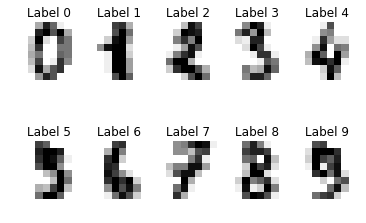

In [5]:
#visualize sample data
samples = list(zip(digits.images, digits.target))
#print(len(samples))
#print(samples[:1])
for id,(img,label) in enumerate(samples[:10]):
    plt.subplot(2,5,id + 1)
    plt.axis("off")
    plt.imshow(img, cmap = plt.cm.gray_r, interpolation = "nearest" )
    plt.title("Label %i" % label)
plt.show()

In [6]:
#reshape the matrix
n = len(digits.images)
data = digits.images.reshape(n,-1)
len(data[0])

64

In [7]:
logistic = LogisticRegression()
decision_tree = tree.DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=5,weights ='distance')

In [8]:
# use first half for training
train_data = data[:n//2]
train_label = digits.target[:n//2]
logistic_model = logistic.fit(train_data,train_label)
decision_tree_model = decision_tree.fit(train_data,train_label)
knn_model = knn.fit(train_data,train_label)


answer = digits.target[n//2:]


In [35]:
def eval_model(model):
#     metrics.confusion_matrix(answer,pred3)                   
#     print(digits.target[n//2:])
#     print(pred3)
    prediction = model.predict(data[n//2:])
    t = sum(1 for a,b in zip(answer,prediction) if a == b)*1.0/len(answer)  
    print(t*1.0/1000)
    print("Accuracy is %f%%"  % t)




In [46]:
def print_confusion_matrix(answer,model):
    prediction = model.predict(data[n//2:])
    confusion_matrix = metrics.confusion_matrix(answer,prediction)
    print(confusion_matrix)

# evaluate knn model

In [37]:
eval_model(knn_model)

0.000954393770857
Accuracy is 0.954394%


In [47]:
print_confusion_matrix(answer,knn)

[[88  0  0  0  0  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 1  0 80  5  0  0  0  0  0  0]
 [ 0  0  1 82  0  1  0  3  3  1]
 [ 0  0  0  0 86  0  0  1  0  5]
 [ 0  0  0  0  0 89  1  0  0  1]
 [ 0  0  0  0  0  0 91  0  0  0]
 [ 0  0  0  0  0  0  0 89  0  0]
 [ 0  4  1  1  0  0  0  1 80  1]
 [ 0  0  0  4  0  2  0  0  1 85]]


# evaluate decision tree model

In [50]:
eval_model(decision_tree_model)

0.000771968854283
Accuracy is 0.771969%


In [51]:
print_confusion_matrix(answer,decision_tree)

[[82  0  0  1  0  4  0  0  1  0]
 [ 0 58  4  8  3  1  1  0  9  7]
 [ 1  2 63  8  0  1  2  0  6  3]
 [ 0  3  0 68  0  4  0  4 10  2]
 [ 1  0  0  0 78  4  2  1  3  3]
 [ 0  2  0  0  0 68  1  0  3 17]
 [ 1  2  0  0  1  1 85  0  1  0]
 [ 0  1  0  6  2  8  0 69  2  1]
 [ 0  4  5  4  3 10  4  3 52  3]
 [ 0  1  0  3  0 13  0  0  4 71]]


# evaluate logistic model

In [52]:
eval_model(logistic_model)

0.000916573971079
Accuracy is 0.916574%


In [53]:
print_confusion_matrix(answer,logistic)

[[85  0  0  0  1  1  1  0  0  0]
 [ 0 81  0  1  0  0  1  0  2  6]
 [ 2  0 84  0  0  0  0  0  0  0]
 [ 0  1  0 75  0  6  0  2  5  2]
 [ 1  2  0  0 86  0  1  0  0  2]
 [ 0  3  0  0  0 82  2  0  0  4]
 [ 0  0  1  0  0  0 90  0  0  0]
 [ 0  1  0  0  0  5  0 79  1  3]
 [ 0  5  1  0  0  3  1  0 77  1]
 [ 2  1  0  0  0  2  0  0  2 85]]


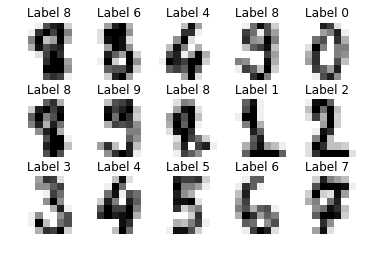

In [367]:
samples = list(zip(digits.images[n//2:],pred))
for id,(img,label) in enumerate (samples[:15]):
    plt.subplot(3,5,id + 1)
    plt.axis("off")
    plt.imshow(img,cmap = plt.cm.gray_r, interpolation = 'nearest')
    plt.title("Label %i" %label)
plt.show()